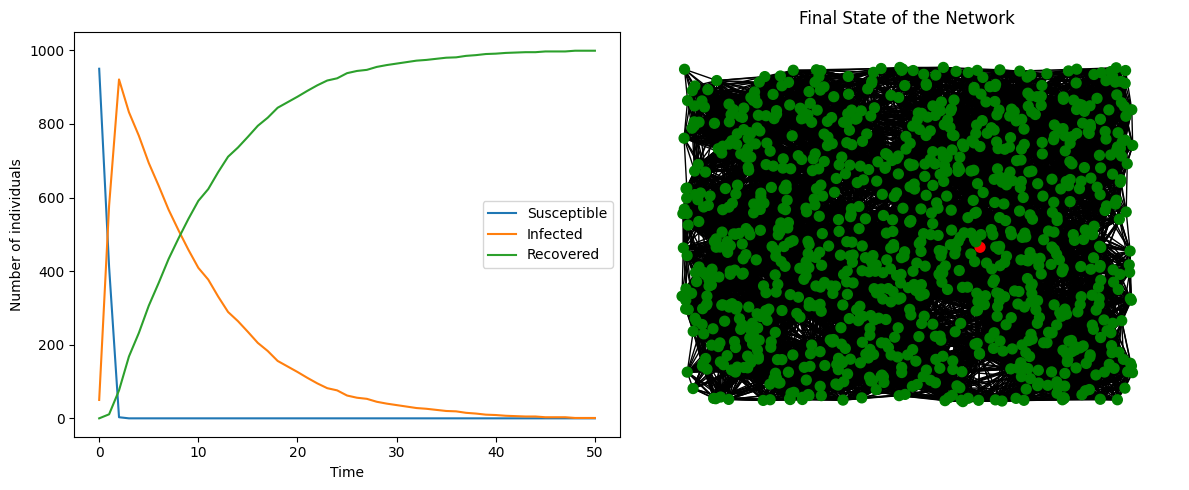

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
N = 100  # Total number of nodes
initial_infected_fraction = 0.05
beta = 0.3  # Transmission probability
gamma = 0.1  # Recovery probability
grid_size = 10  # Size of the 2D grid

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G = nx.random_geometric_graph(N, radius=1.5, pos={i: positions[i] for i in range(N)})

# Initialize states: 0 = S, 1 = I, 2 = R
states = np.zeros(N)
initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
states[initial_infected] = 1

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Simulate the SIR model
timesteps = 50
S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]

for t in range(timesteps):
    states = update_states(G, states, beta, gamma)
    S.append(np.sum(states == 0))
    I.append(np.sum(states == 1))
    R.append(np.sum(states == 2))

# Plot results
plt.figure(figsize=(12, 5))

# Plot SIR curves
plt.subplot(1, 2, 1)
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.legend()

# Plot network with infected nodes
plt.subplot(1, 2, 2)
colors = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in states]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors, with_labels=False, node_size=50)
plt.title('Final State of the Network')

plt.tight_layout()
plt.show()


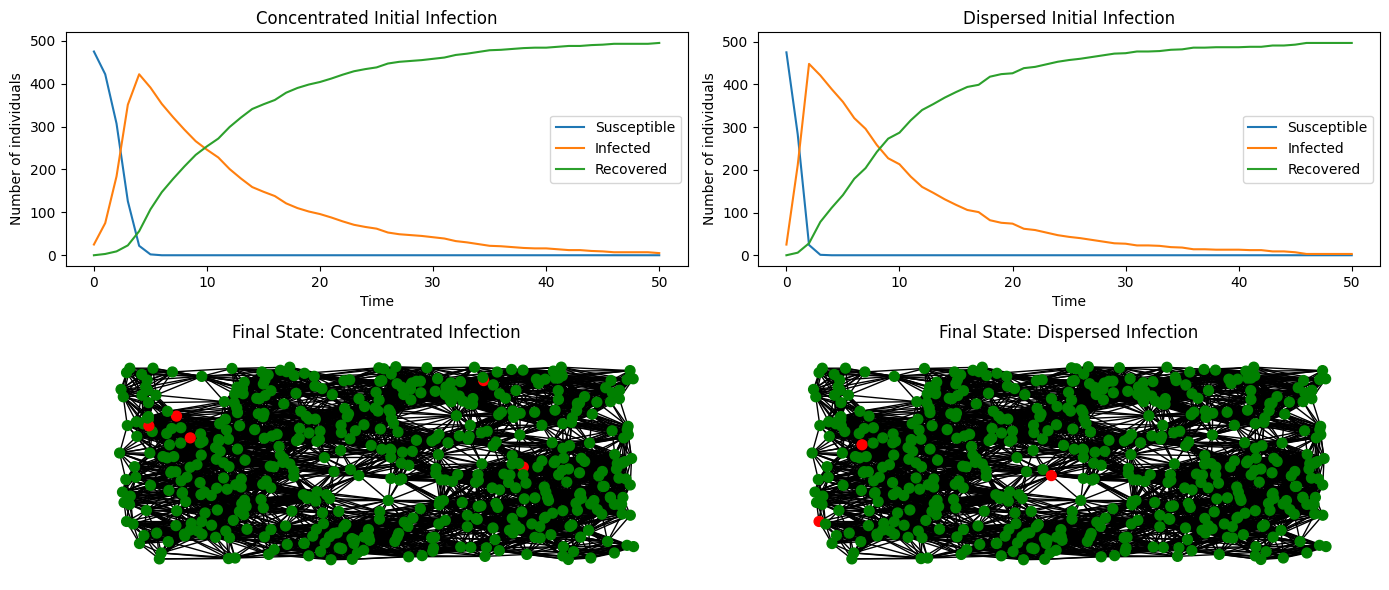

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix

# Parameters
N = 200  # Total number of nodes
initial_infected_fraction = 0.05
beta = 0.3  # Transmission probability
gamma = 0.1  # Recovery probability
grid_size = 10  # Size of the 2D grid
radius = 1.5  # Radius for connecting nodes in the geometric graph
timesteps = 50

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G = nx.random_geometric_graph(N, radius, pos={i: positions[i] for i in range(N)})

# Function to initialize infection states
def initialize_states(concentrated=True):
    states = np.zeros(N)
    if concentrated:
        center = np.array([grid_size / 2, grid_size / 2])
        distances = np.linalg.norm(positions - center, axis=1)
        sorted_indices = np.argsort(distances)
        initial_infected = sorted_indices[:int(N * initial_infected_fraction)]
    else:
        initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
    states[initial_infected] = 1
    return states

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
    return S, I, R, states

# Simulate concentrated initial infection
initial_states_concentrated = initialize_states(concentrated=True)
S_concentrated, I_concentrated, R_concentrated, final_states_concentrated = simulate_SIR(G, initial_states_concentrated, beta, gamma, timesteps)

# Simulate dispersed initial infection
initial_states_dispersed = initialize_states(concentrated=False)
S_dispersed, I_dispersed, R_dispersed, final_states_dispersed = simulate_SIR(G, initial_states_dispersed, beta, gamma, timesteps)

# Plot results
plt.figure(figsize=(14, 6))

# Plot SIR curves for concentrated initial infection
plt.subplot(2, 2, 1)
plt.plot(S_concentrated, label='Susceptible')
plt.plot(I_concentrated, label='Infected')
plt.plot(R_concentrated, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('Concentrated Initial Infection')
plt.legend()

# Plot SIR curves for dispersed initial infection
plt.subplot(2, 2, 2)
plt.plot(S_dispersed, label='Susceptible')
plt.plot(I_dispersed, label='Infected')
plt.plot(R_dispersed, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('Dispersed Initial Infection')
plt.legend()

# Plot network with final states for concentrated initial infection
plt.subplot(2, 2, 3)
colors_concentrated = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in final_states_concentrated]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors_concentrated, with_labels=False, node_size=50)
plt.title('Final State: Concentrated Infection')

# Plot network with final states for dispersed initial infection
plt.subplot(2, 2, 4)
colors_dispersed = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in final_states_dispersed]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors_dispersed, with_labels=False, node_size=50)
plt.title('Final State: Dispersed Infection')

plt.tight_layout()
plt.show()


C:\Users\chloe_\AppData\Local\Temp\ipykernel_21540\10746590.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\chloe_\AppData\Local\Temp\ipykernel_21540\10746590.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


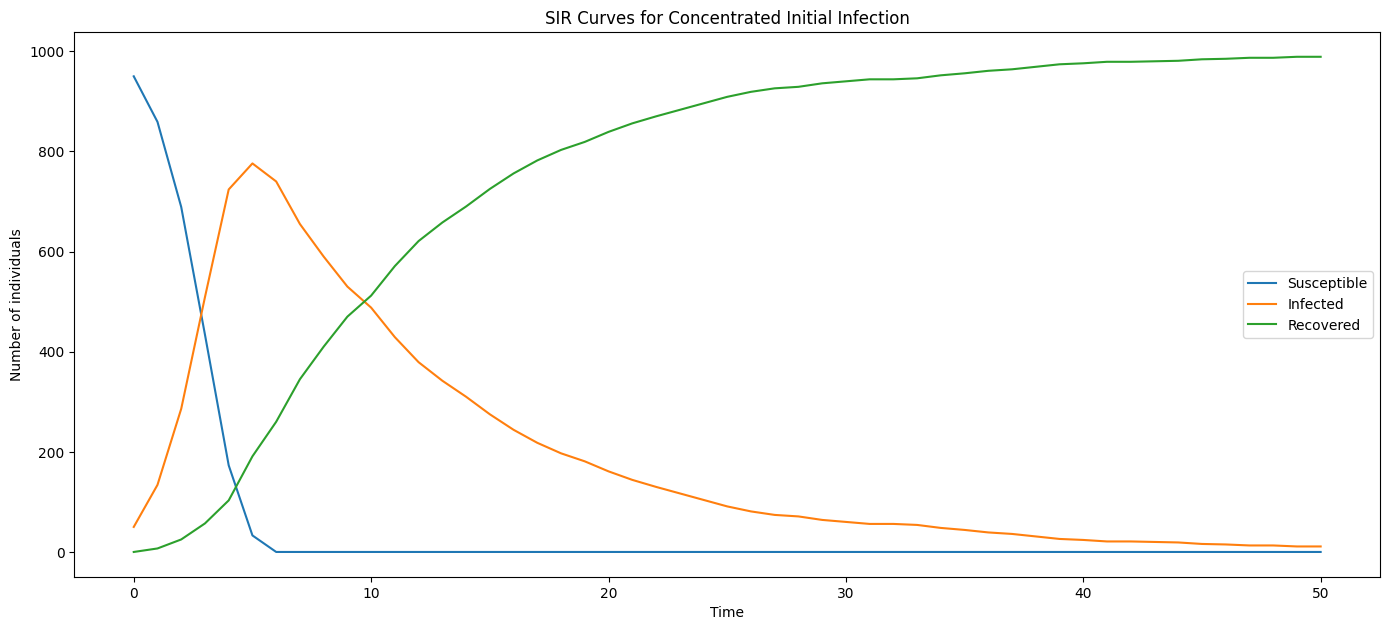

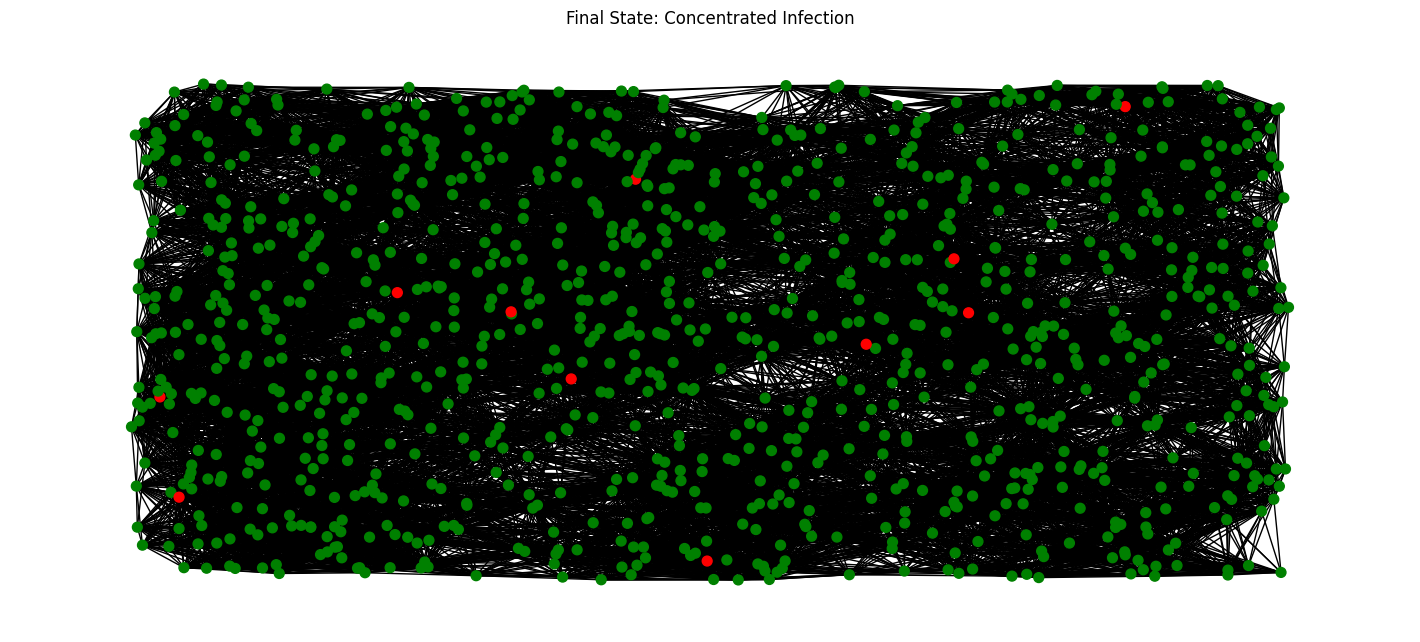

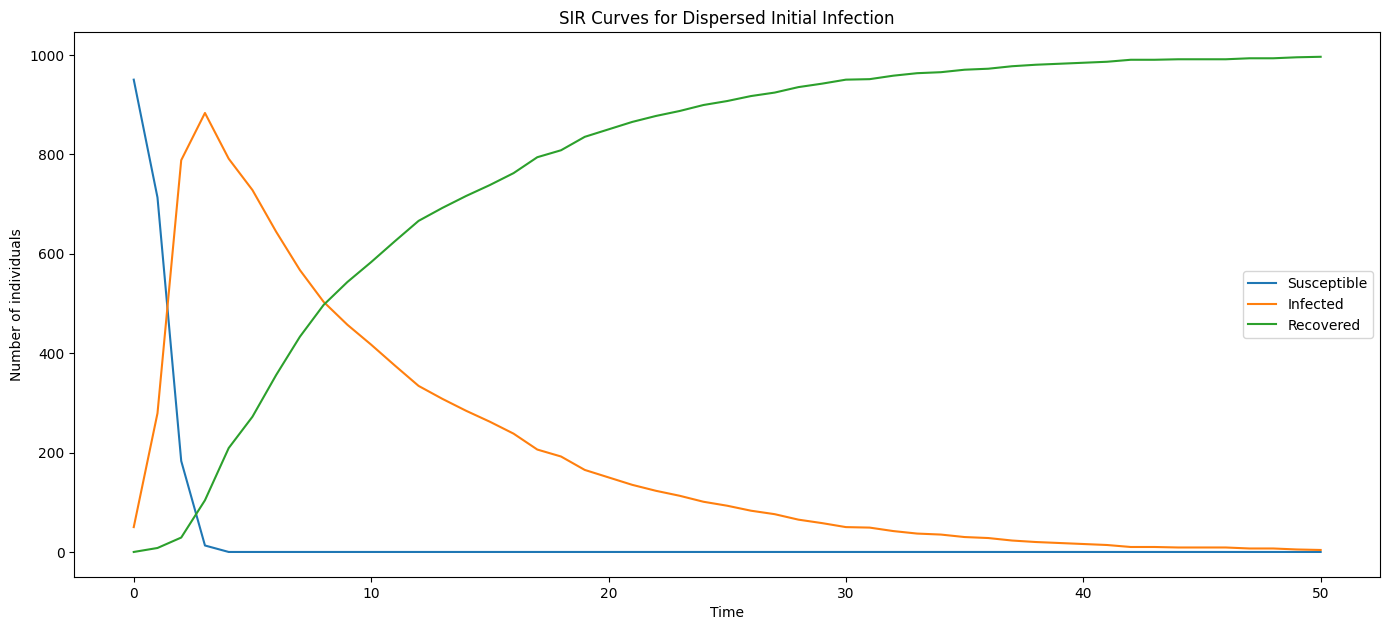

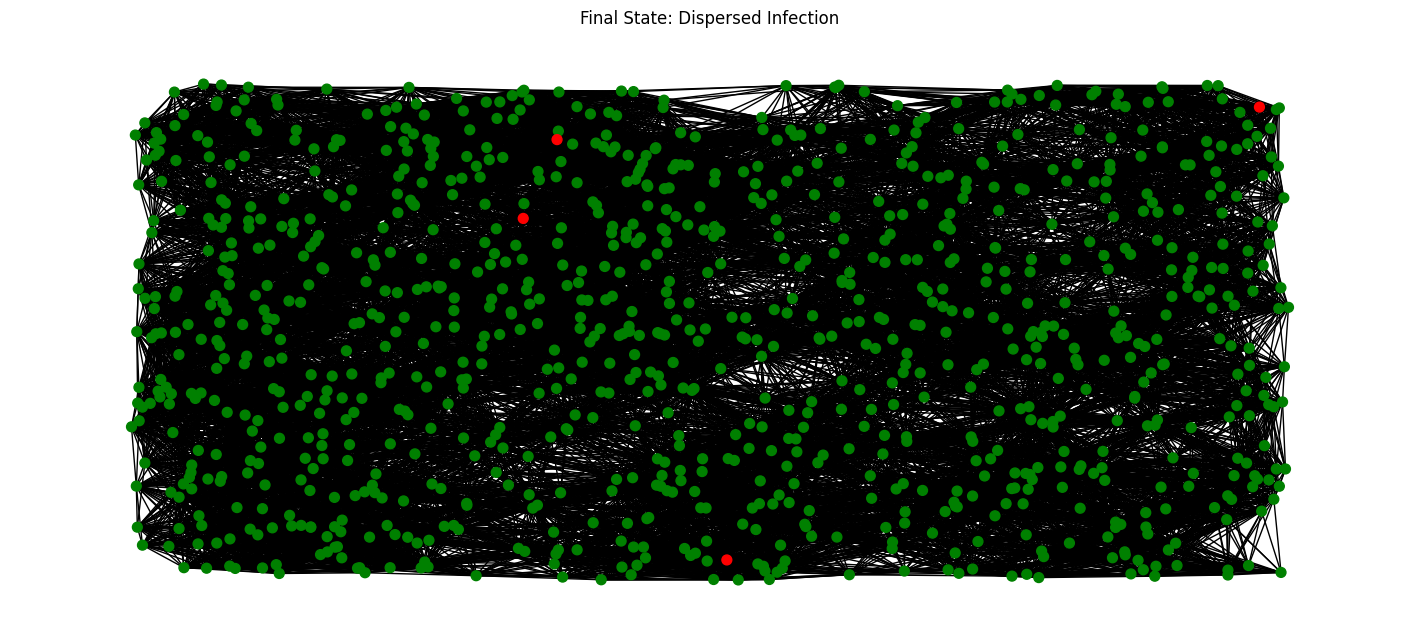

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix

# Parameters
N = 1000  # Total number of nodes
initial_infected_fraction = 0.05
beta = 0.1  # Transmission probability
gamma = 0.1  # Recovery probability
grid_size = 10  # Size of the 2D grid
radius = 1.5  # Radius for connecting nodes in the geometric graph
timesteps = 50

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G = nx.random_geometric_graph(N, radius, pos={i: positions[i] for i in range(N)})

# Function to initialize infection states
def initialize_states(concentrated=True):
    states = np.zeros(N)
    if concentrated:
        center = np.array([grid_size / 2, grid_size / 2])
        distances = np.linalg.norm(positions - center, axis=1)
        sorted_indices = np.argsort(distances)
        initial_infected = sorted_indices[:int(N * initial_infected_fraction)]
    else:
        initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
    states[initial_infected] = 1
    return states

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
    return S, I, R, states

# Simulate concentrated initial infection
initial_states_concentrated = initialize_states(concentrated=True)
S_concentrated, I_concentrated, R_concentrated, final_states_concentrated = simulate_SIR(G, initial_states_concentrated, beta, gamma, timesteps)

# Simulate dispersed initial infection
initial_states_dispersed = initialize_states(concentrated=False)
S_dispersed, I_dispersed, R_dispersed, final_states_dispersed = simulate_SIR(G, initial_states_dispersed, beta, gamma, timesteps)

# Plot results
plt.figure(figsize=(14, 12))

# Plot SIR curves and final state for concentrated initial infection
plt.subplot(2, 1, 1)
plt.plot(S_concentrated, label='Susceptible')
plt.plot(I_concentrated, label='Infected')
plt.plot(R_concentrated, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('SIR Curves for Concentrated Initial Infection')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(14, 6))
colors_concentrated = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in final_states_concentrated]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors_concentrated, with_labels=False, node_size=50)
plt.title('Final State: Concentrated Infection')
plt.tight_layout()

# Plot SIR curves and final state for dispersed initial infection
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
plt.plot(S_dispersed, label='Susceptible')
plt.plot(I_dispersed, label='Infected')
plt.plot(R_dispersed, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('SIR Curves for Dispersed Initial Infection')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(14, 6))
colors_dispersed = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in final_states_dispersed]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors_dispersed, with_labels=False, node_size=50)
plt.title('Final State: Dispersed Infection')
plt.tight_layout()

plt.show()


C:\Users\chloe_\AppData\Local\Temp\ipykernel_15712\658018609.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\chloe_\AppData\Local\Temp\ipykernel_15712\658018609.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


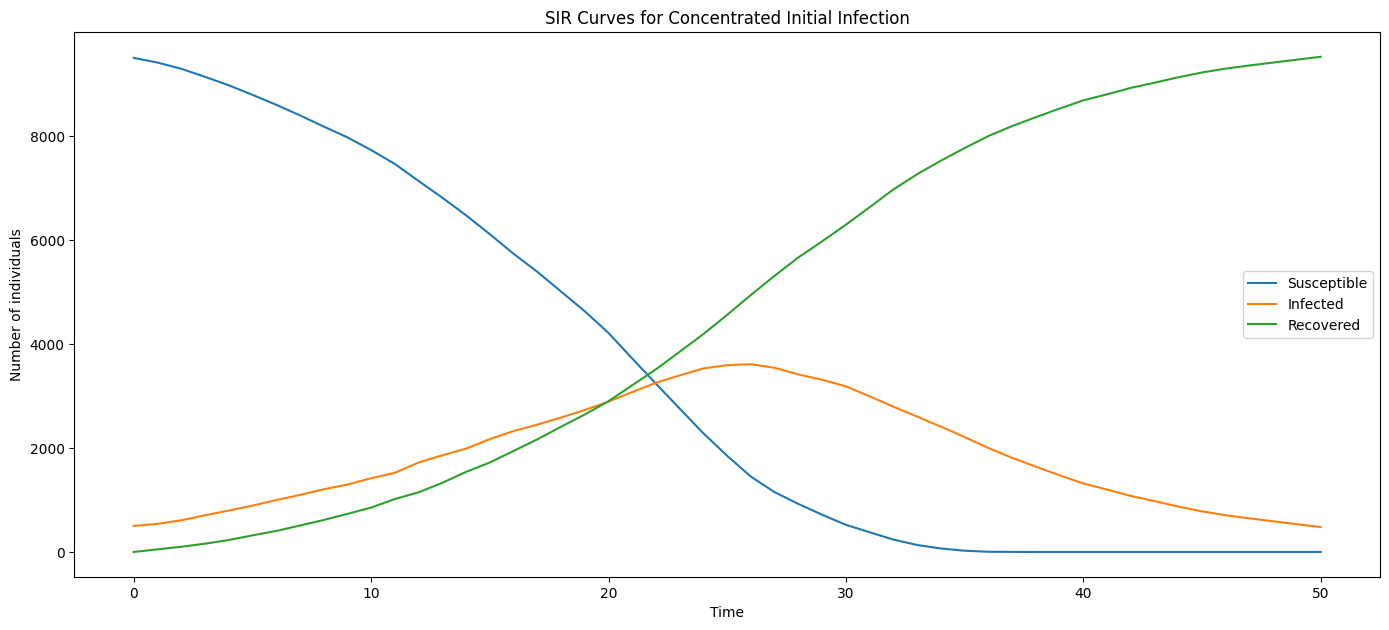

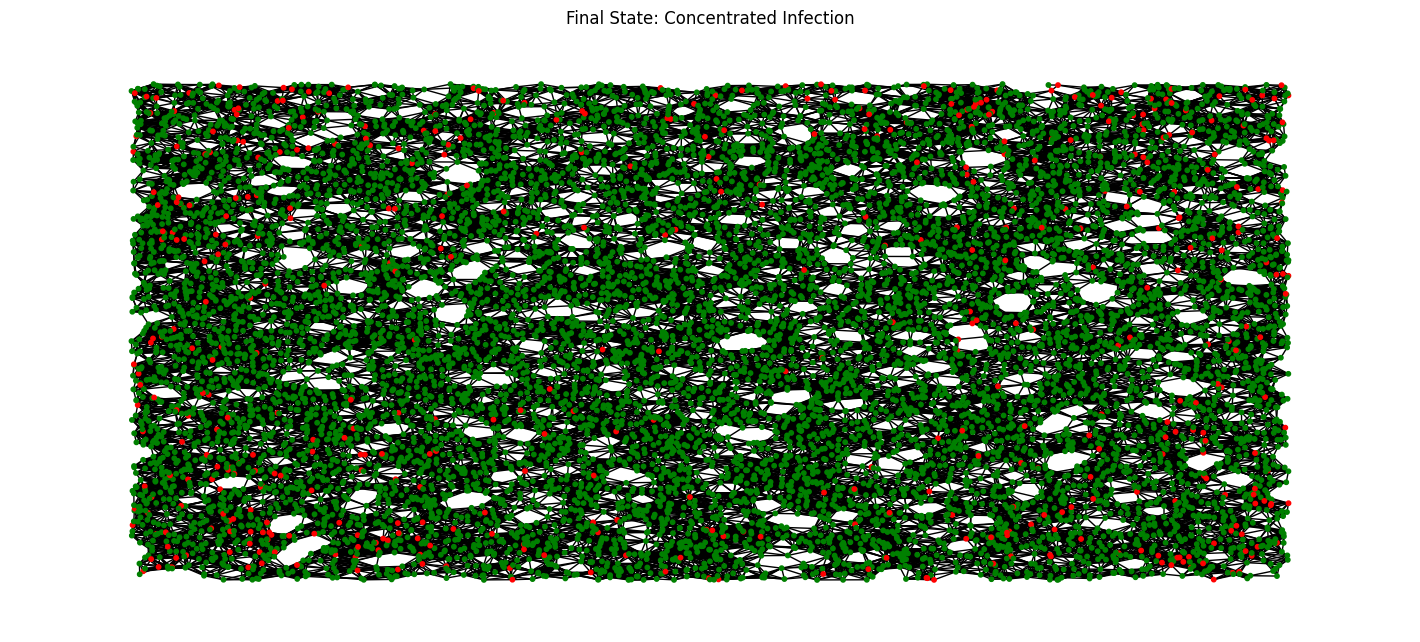

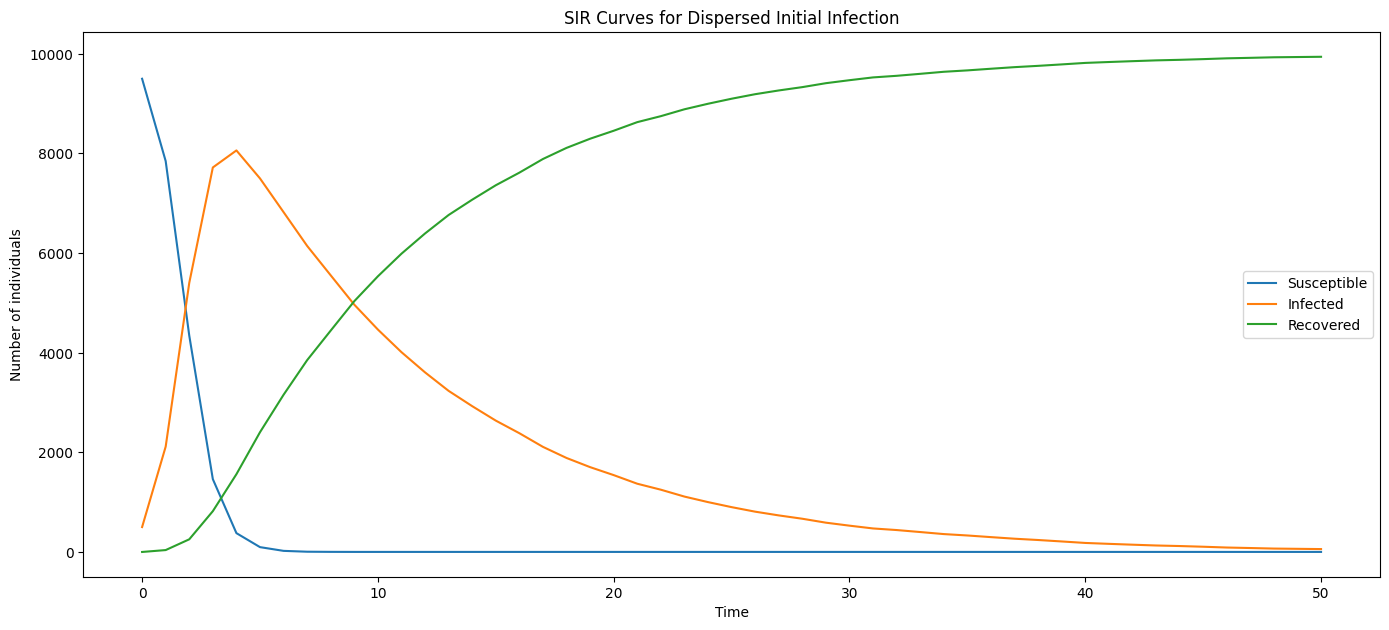

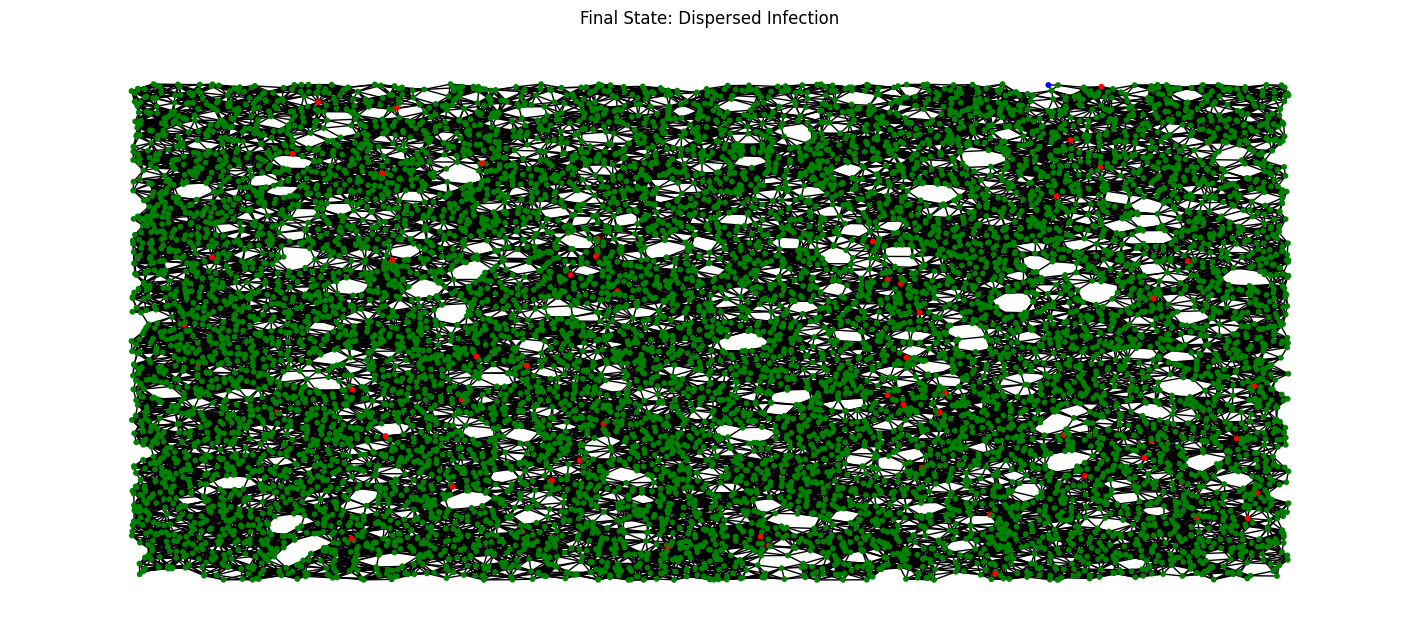

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix

# Parameters
N = 10000  # Total number of nodes
initial_infected_fraction = 0.05
beta = 0.2  # Transmission probability
gamma = 0.1  # Recovery probability
grid_size = 10  # Size of the 2D grid
target_avg_degree = 20  # Target average number of friends (connections)
timesteps = 50

# Calculate the appropriate radius to achieve the target average degree
def calculate_radius(N, grid_size, target_avg_degree):
    area = grid_size ** 2
    density = N / area
    radius = np.sqrt(target_avg_degree / (np.pi * density))
    return radius

radius = calculate_radius(N, grid_size, target_avg_degree)

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G = nx.random_geometric_graph(N, radius, pos={i: positions[i] for i in range(N)})

# Function to initialize infection states
def initialize_states(concentrated=True):
    states = np.zeros(N)
    if concentrated:
        center = np.array([grid_size / 2, grid_size / 2])
        distances = np.linalg.norm(positions - center, axis=1)
        sorted_indices = np.argsort(distances)
        initial_infected = sorted_indices[:int(N * initial_infected_fraction)]
    else:
        initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
    states[initial_infected] = 1
    return states

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
    return S, I, R, states

# Simulate concentrated initial infection
initial_states_concentrated = initialize_states(concentrated=True)
S_concentrated, I_concentrated, R_concentrated, final_states_concentrated = simulate_SIR(G, initial_states_concentrated, beta, gamma, timesteps)

# Simulate dispersed initial infection
initial_states_dispersed = initialize_states(concentrated=False)
S_dispersed, I_dispersed, R_dispersed, final_states_dispersed = simulate_SIR(G, initial_states_dispersed, beta, gamma, timesteps)

# Plot results
plt.figure(figsize=(14, 12))

# Plot SIR curves and final state for concentrated initial infection
plt.subplot(2, 1, 1)
plt.plot(S_concentrated, label='Susceptible')
plt.plot(I_concentrated, label='Infected')
plt.plot(R_concentrated, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('SIR Curves for Concentrated Initial Infection')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(14, 6))
colors_concentrated = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in final_states_concentrated]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors_concentrated, with_labels=False, node_size=10)
plt.title('Final State: Concentrated Infection')
plt.tight_layout()

# Plot SIR curves and final state for dispersed initial infection
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
plt.plot(S_dispersed, label='Susceptible')
plt.plot(I_dispersed, label='Infected')
plt.plot(R_dispersed, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('SIR Curves for Dispersed Initial Infection')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(14, 6))
colors_dispersed = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in final_states_dispersed]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors_dispersed, with_labels=False, node_size=10)
plt.title('Final State: Dispersed Infection')
plt.tight_layout()

plt.show()


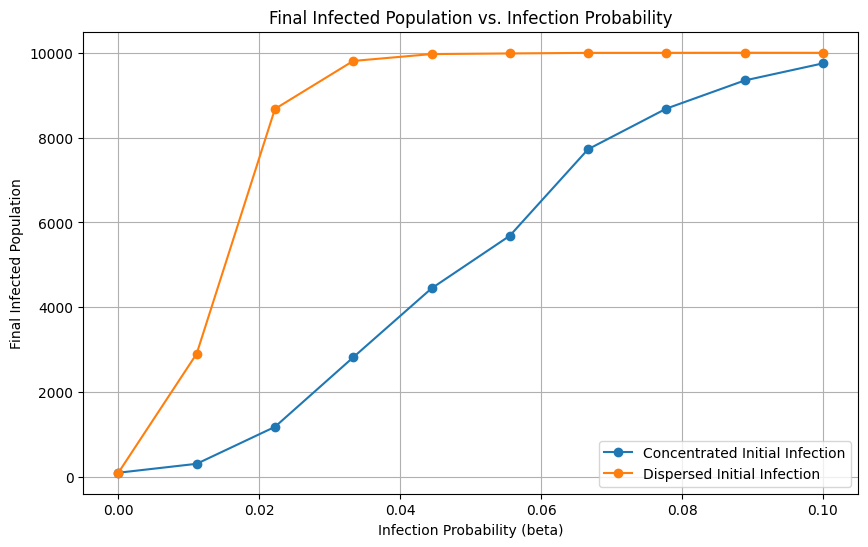

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix

# Parameters
N = 10000  # Total number of nodes
initial_infected_fraction = 0.01
gamma = 0.1  # Recovery probability
grid_size = 10  # Size of the 2D grid
target_avg_degree = 20  # Target average number of friends (connections)
timesteps = 50
beta_values = np.linspace(0, 0.1, 10)  # Different infection probabilities to test

# Calculate the appropriate radius to achieve the target average degree
def calculate_radius(N, grid_size, target_avg_degree):
    area = grid_size ** 2
    density = N / area
    radius = np.sqrt(target_avg_degree / (np.pi * density))
    return radius

radius = calculate_radius(N, grid_size, target_avg_degree)

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G = nx.random_geometric_graph(N, radius, pos={i: positions[i] for i in range(N)})

# Function to initialize infection states
def initialize_states(concentrated=True):
    states = np.zeros(N)
    if concentrated:
        center = np.array([grid_size / 2, grid_size / 2])
        distances = np.linalg.norm(positions - center, axis=1)
        sorted_indices = np.argsort(distances)
        initial_infected = sorted_indices[:int(N * initial_infected_fraction)]
    else:
        initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
    states[initial_infected] = 1
    return states

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
    return S, I, R, states

# Function to get the final number of infected individuals
def final_infected(states):
    return np.sum(states == 1) + np.sum(states == 2)  # Infected + Recovered

# Run simulations for different beta values
final_infected_concentrated = []
final_infected_dispersed = []

for beta in beta_values:
    # Simulate concentrated initial infection
    initial_states_concentrated = initialize_states(concentrated=True)
    _, _, _, final_states_concentrated = simulate_SIR(G, initial_states_concentrated, beta, gamma, timesteps)
    final_infected_concentrated.append(final_infected(final_states_concentrated))
    
    # Simulate dispersed initial infection
    initial_states_dispersed = initialize_states(concentrated=False)
    _, _, _, final_states_dispersed = simulate_SIR(G, initial_states_dispersed, beta, gamma, timesteps)
    final_infected_dispersed.append(final_infected(final_states_dispersed))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(beta_values, final_infected_concentrated, label='Concentrated Initial Infection', marker='o')
plt.plot(beta_values, final_infected_dispersed, label='Dispersed Initial Infection', marker='o')
plt.xlabel('Infection Probability (beta)')
plt.ylabel('Final Infected Population')
plt.title('Final Infected Population vs. Infection Probability')
plt.legend()
plt.grid(True)
plt.show()


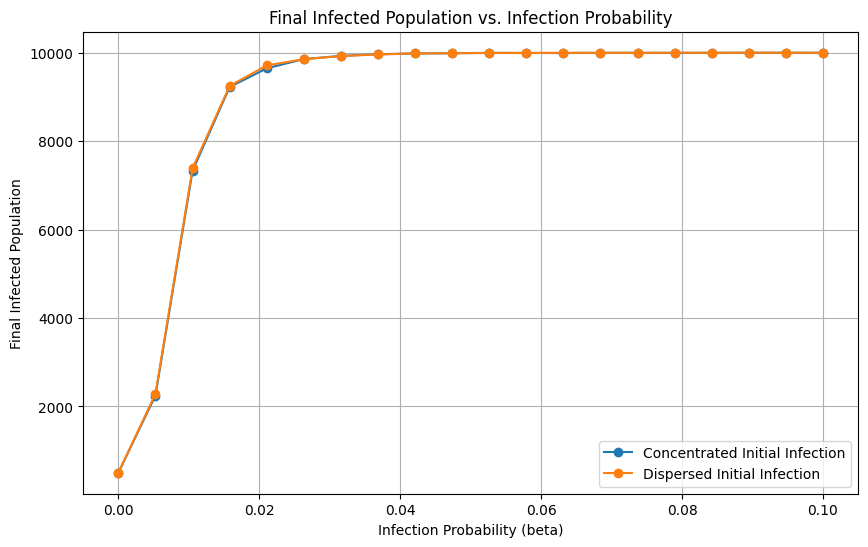

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix

# Parameters
N = 10000  # Total number of nodes
initial_infected_fraction = 0.05
gamma = 0.1  # Recovery probability
grid_size = 10  # Size of the 2D grid
target_avg_degree = 20  # Target average number of friends (connections)
timesteps = 50
beta_values = np.linspace(0, 0.1, 20)  # Different infection probabilities to test

# Calculate the appropriate radius to achieve the target average degree
def calculate_radius(N, grid_size, target_avg_degree):
    area = grid_size ** 2
    density = N / area
    radius = np.sqrt(target_avg_degree / (np.pi * density))
    return radius

radius = calculate_radius(N, grid_size, target_avg_degree)

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
p = target_avg_degree / (N - 1)
G = nx.erdos_renyi_graph(N, p)

# Function to initialize infection states
def initialize_states(concentrated=True):
    states = np.zeros(N)
    if concentrated:
        center = np.array([grid_size / 2, grid_size / 2])
        distances = np.linalg.norm(positions - center, axis=1)
        sorted_indices = np.argsort(distances)
        initial_infected = sorted_indices[:int(N * initial_infected_fraction)]
    else:
        initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
    states[initial_infected] = 1
    return states

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
    return S, I, R, states

# Function to get the final number of infected individuals
def final_infected(states):
    return np.sum(states == 1) + np.sum(states == 2)  # Infected + Recovered

# Run simulations for different beta values
final_infected_concentrated = []
final_infected_dispersed = []

for beta in beta_values:
    # Simulate concentrated initial infection
    initial_states_concentrated = initialize_states(concentrated=True)
    _, _, _, final_states_concentrated = simulate_SIR(G, initial_states_concentrated, beta, gamma, timesteps)
    final_infected_concentrated.append(final_infected(final_states_concentrated))
    
    # Simulate dispersed initial infection
    initial_states_dispersed = initialize_states(concentrated=False)
    _, _, _, final_states_dispersed = simulate_SIR(G, initial_states_dispersed, beta, gamma, timesteps)
    final_infected_dispersed.append(final_infected(final_states_dispersed))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(beta_values, final_infected_concentrated, label='Concentrated Initial Infection', marker='o')
plt.plot(beta_values, final_infected_dispersed, label='Dispersed Initial Infection', marker='o')
plt.xlabel('Infection Probability (beta)')
plt.ylabel('Final Infected Population')
plt.title('Final Infected Population vs. Infection Probability')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

print("yo")

# Parameters
N = 10000  # Total number of nodes
initial_infected_fraction = 0.05
gamma = 0.1  # Recovery probability
target_avg_degree = 20  # Target average number of friends (connections)
timesteps = 50
beta_values = np.linspace(0.1, 0.5, 40)  # Refined range of infection probabilities around the critical threshold

# Calculate the probability p for the Erdős-Rényi model to achieve the target average degree
p = target_avg_degree / (N - 1)

# Create a Poisson network (Erdős-Rényi graph)
G_poisson = nx.erdos_renyi_graph(N, p)

# Parameters for geometric network
grid_size = 10
radius = 1.5

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G_geometric = nx.random_geometric_graph(N, radius, pos={i: positions[i] for i in range(N)})

# Function to initialize infection states and measure concentration
def initialize_states_and_measure_concentration(G, concentrated=True):
    states = np.zeros(N)
    if concentrated:
        center_index = np.random.choice(N, 1)[0]
        shortest_paths = nx.single_source_shortest_path_length(G, center_index)
        sorted_indices = sorted(shortest_paths, key=shortest_paths.get)
        initial_infected = sorted_indices[:int(N * initial_infected_fraction)]
    else:
        initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
    
    states[initial_infected] = 1
    
    # Measure concentration
    subgraph = G.subgraph(initial_infected)
    if len(subgraph.nodes) > 1:
        lengths = dict(nx.all_pairs_shortest_path_length(subgraph))
        mean_distance = np.mean([lengths[u][v] for u in lengths for v in lengths[u] if u != v])
    else:
        mean_distance = 0
    
    return states, mean_distance

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
    return S, I, R, states

# Function to get the final number of infected individuals
def final_infected(states):
    return np.sum(states == 1) + np.sum(states == 2)  # Infected + Recovered

# Compute average shortest path lengths
avg_shortest_path_length_poisson = nx.average_shortest_path_length(G_poisson)
avg_shortest_path_length_geometric = nx.average_shortest_path_length(G_geometric)

# Run simulations for different beta values on Poisson network
final_infected_poisson = []
concentration_measures_poisson = []

print("yo")

for beta in beta_values:
    print("hi")
    # Simulate initial infection on Poisson network
    initial_states, mean_distance = initialize_states_and_measure_concentration(G_poisson, concentrated=True)
    # _, _, _, final_states = simulate_SIR(G_poisson, initial_states, beta, gamma, timesteps)
    # final_infected_poisson.append(final_infected(final_states))
    
    # Normalize mean shortest path distance by average shortest path length of the Poisson network
    concentration_measures_poisson.append(mean_distance / avg_shortest_path_length_poisson)

# Run simulations for different beta values on geometric network
final_infected_geometric = []
concentration_measures_geometric = []

for beta in beta_values:
    print("bye")
    # Simulate initial infection on geometric network
    initial_states, mean_distance = initialize_states_and_measure_concentration(G_geometric, concentrated=True)
    # _, _, _, final_states = simulate_SIR(G_geometric, initial_states, beta, gamma, timesteps)
    # final_infected_geometric.append(final_infected(final_states))
    
    # Normalize mean shortest path distance by average shortest path length of the geometric network
    concentration_measures_geometric.append(mean_distance / avg_shortest_path_length_geometric)

# Plot results
plt.figure(figsize=(10, 6))

# Final Infected Population vs. Infection Probability
plt.subplot(2, 1, 1)
plt.plot(beta_values, final_infected_poisson, label='Poisson Network', marker='o')
plt.plot(beta_values, final_infected_geometric, label='Geometric Network', marker='o')
plt.xlabel('Infection Probability (beta)')
plt.ylabel('Final Infected Population')
plt.title('Final Infected Population vs. Infection Probability')
plt.legend()
plt.grid(True)

# Normalized Mean Shortest Path Distance vs. Infection Probability
plt.subplot(2, 1, 2)
plt.plot(beta_values, concentration_measures_poisson, label='Poisson Network', marker='o')
plt.plot(beta_values, concentration_measures_geometric, label='Geometric Network', marker='o')
plt.xlabel('Infection Probability (beta)')
plt.ylabel('Normalized Mean Shortest Path Distance')
plt.title('Concentration of Initial Infection vs. Infection Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


yo


KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
N = 10000  # Total number of nodes
initial_infected_fraction = 0.05
gamma = 0.1  # Recovery probability
target_avg_degree = 20  # Target average number of friends (connections)
timesteps = 50
beta_values = np.linspace(0.1, 0.5, 40)  # Range of infection probabilities around the critical threshold

# Parameters for geometric network
grid_size = 10
radius = 1.5

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G_geometric = nx.random_geometric_graph(N, radius, pos={i: positions[i] for i in range(N)})

# Function to initialize infection states with varying clustering
def initialize_states_with_clustering(G, clustering_factor):
    states = np.zeros(N)
    center_index = np.random.choice(N, 1)[0]
    shortest_paths = nx.single_source_shortest_path_length(G, center_index)
    sorted_indices = sorted(shortest_paths, key=shortest_paths.get)
    
    # Adjust the range of initial infection based on clustering factor
    range_limit = int(N * initial_infected_fraction * clustering_factor)
    initial_infected = sorted_indices[:range_limit]
    
    # If clustering factor < 1, add some dispersed infections
    if clustering_factor < 1:
        remaining_infected = int(N * initial_infected_fraction) - range_limit
        additional_infected = np.random.choice(sorted_indices[range_limit:], remaining_infected, replace=False)
        initial_infected = np.concatenate((initial_infected, additional_infected))
    
    states[initial_infected] = 1
    return states

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
    return S, I, R, states

# Function to get the final number of infected individuals
def final_infected(states):
    return np.sum(states == 1) + np.sum(states == 2)  # Infected + Recovered

# Define different clustering factors (1.0 = fully concentrated, 0.0 = fully dispersed)
clustering_factors = np.linspace(1.0, 0.0, 5)

# Run simulations for different clustering factors and beta values on geometric network
results_geometric = []
for clustering_factor in clustering_factors:
    final_infected_geometric = []
    for beta in beta_values:
        # Simulate initial infection on geometric network
        initial_states = initialize_states_with_clustering(G_geometric, clustering_factor)
        _, _, _, final_states = simulate_SIR(G_geometric, initial_states, beta, gamma, timesteps)
        final_infected_geometric.append(final_infected(final_states))
    results_geometric.append(final_infected_geometric)

# Plot results for geometric network
plt.figure(figsize=(14, 6))
for i, clustering_factor in enumerate(clustering_factors):
    plt.plot(beta_values, results_geometric[i], label=f'Clustering factor: {clustering_factor:.1f}')
plt.xlabel('Infection Probability (beta)')
plt.ylabel('Final Infected Population')
plt.title('Final Infected Population vs. Infection Probability (Geometric Network)')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

0.017841241161527712


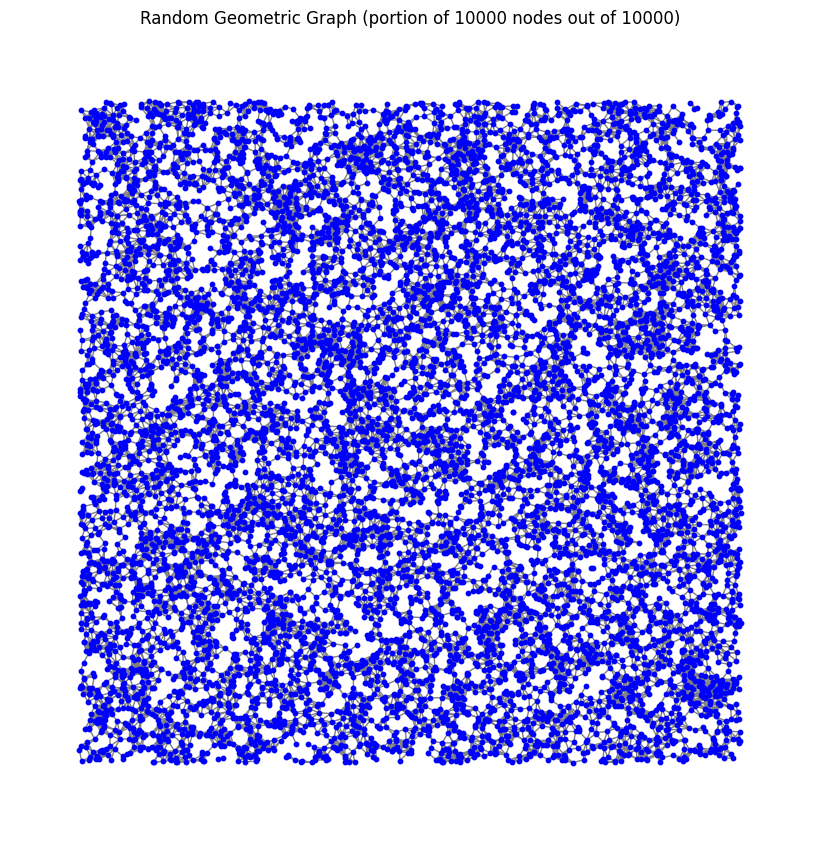

In [31]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10000
avg_degree = 10

# Calculate the radius to achieve the desired average degree
area = 1  # Assuming the nodes are placed in a unit square
radius = np.sqrt(avg_degree / (np.pi * n / area))

print(radius)

# Generate the RGG
G = nx.random_geometric_graph(n, radius)

# Plotting a small portion of the graph
portion = 10000  # Number of nodes to plot
nodes = list(G.nodes)[:portion]
subgraph = G.subgraph(nodes)

pos = nx.get_node_attributes(G, 'pos')
subgraph_pos = {node: pos[node] for node in nodes}

# Plotting
plt.figure(figsize=(8, 8))
nx.draw(subgraph, pos=subgraph_pos, node_size=10, edge_color='gray', node_color='blue')
plt.title(f'Random Geometric Graph (portion of {portion} nodes out of {n})')
plt.show()


In [25]:
import numpy as np
import networkx as nx
from collections import Counter

# Generate the RGG with desired parameters
n = 10000
avg_degree = 20

# Calculate the radius to achieve the desired average degree
area = 1  # Assuming the nodes are placed in a unit square
radius = np.sqrt(avg_degree / (np.pi * n / area))

# Generate the RGG
G = nx.random_geometric_graph(n, radius)

# Calculate the average degree
degrees = dict(G.degree()).values()
print(Counter(degrees))
average_degree = np.mean(list(degrees))

print(f"Calculated average degree: {average_degree}")

# Optional: Compare it with the desired average degree
print(f"Desired average degree: {avg_degree}")


Counter({19: 867, 20: 843, 18: 826, 21: 812, 17: 728, 22: 694, 16: 657, 23: 650, 15: 552, 24: 492, 14: 454, 25: 426, 13: 326, 26: 310, 27: 265, 12: 209, 28: 171, 11: 141, 29: 124, 10: 107, 30: 73, 9: 69, 8: 50, 31: 47, 32: 38, 33: 22, 7: 19, 6: 12, 34: 9, 5: 4, 35: 2, 4: 1})
Calculated average degree: 19.5634
Desired average degree: 20


7031 2918 51
2644 7025 331
587 8400 1013
124 8022 1854
35 7296 2669
8 6609 3383
1 5937 4062
0 5368 4632
0 4832 5168
0 4332 5668
0 3896 6104
0 3495 6505
0 3148 6852
0 2823 7177
0 2555 7445
0 2312 7688
0 2090 7910
0 1897 8103
0 1731 8269
0 1540 8460
0 1399 8601
0 1253 8747
0 1138 8862
0 1020 8980
0 928 9072
0 835 9165
0 749 9251
0 654 9346
0 584 9416
0 510 9490
0 457 9543
0 412 9588
0 368 9632
0 336 9664
0 304 9696
0 277 9723
0 252 9748
0 229 9771
0 211 9789
0 187 9813
0 173 9827
0 153 9847
0 137 9863
0 122 9878
0 112 9888
0 98 9902
0 92 9908
0 76 9924
0 69 9931
0 62 9938


C:\Users\chloe_\AppData\Local\Temp\ipykernel_15712\3124948733.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1400x1200 with 0 Axes>

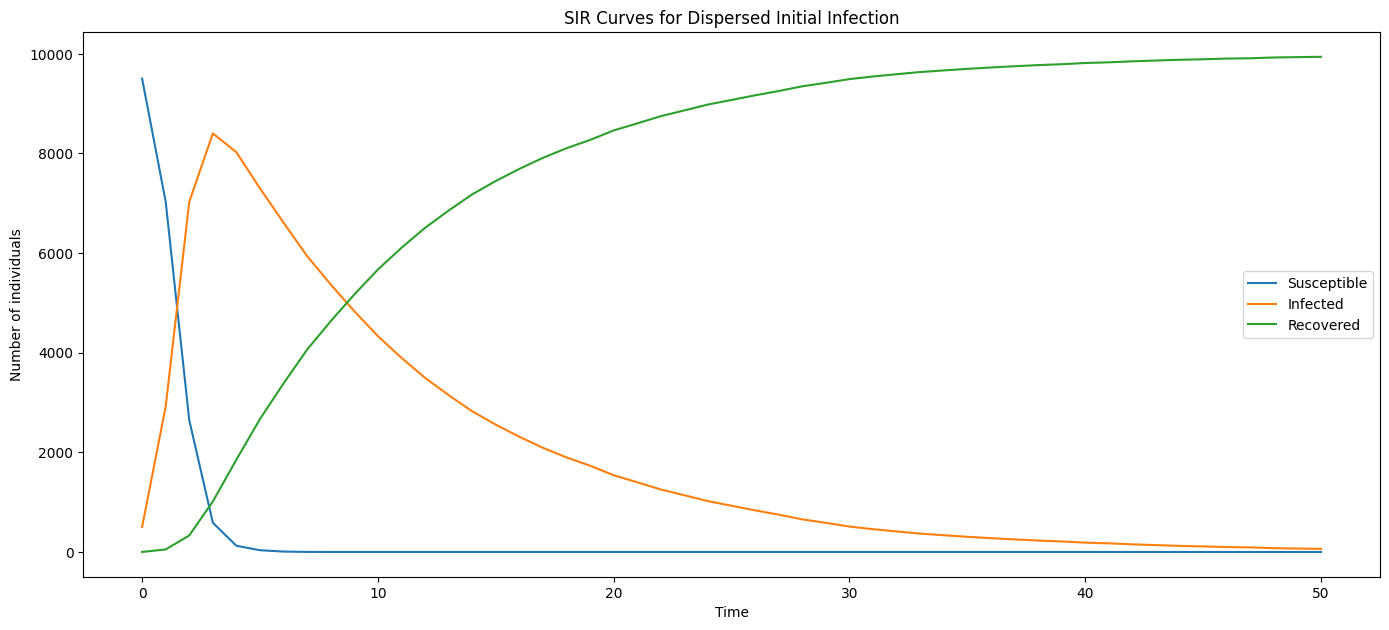

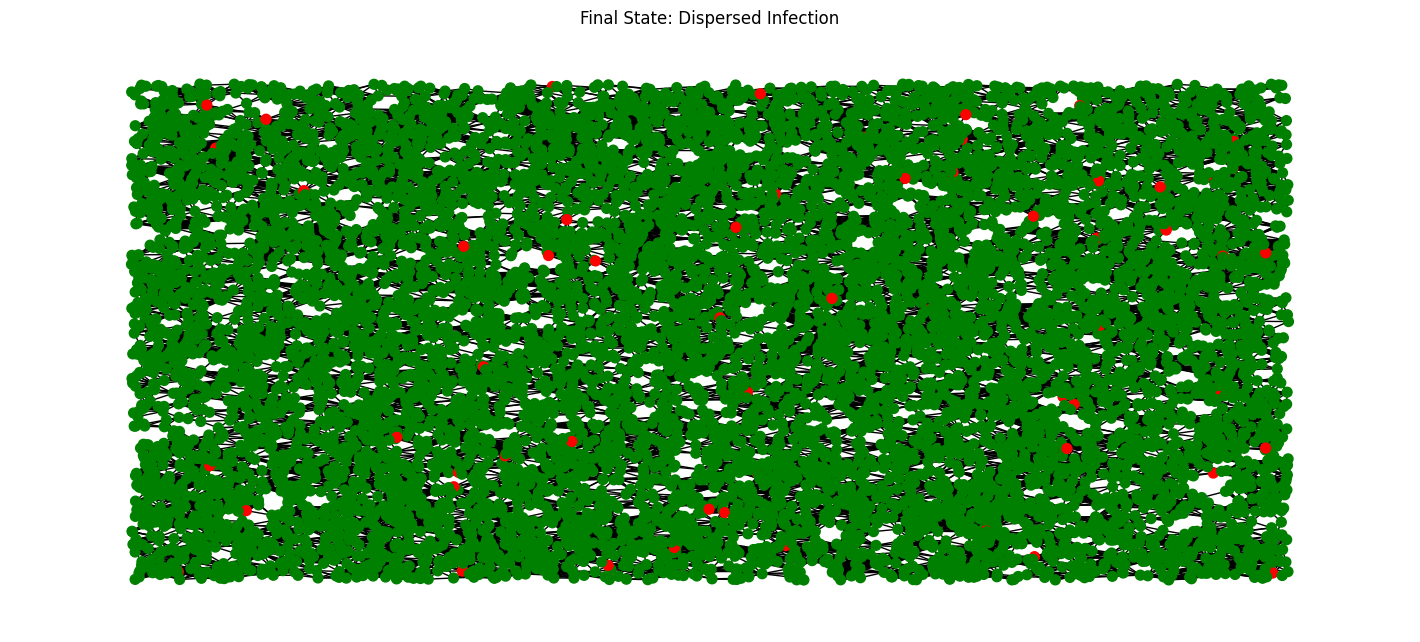

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix

# Parameters
N = 10000  # Total number of nodes
initial_infected_fraction = 0.05
beta = 0.3  # Transmission probability
gamma = 0.1  # Recovery probability
grid_size = 1  # Size of the 2D grid
radius = np.sqrt(20 / (np.pi * N))
timesteps = 50

# Create a geometric network
positions = np.random.rand(N, 2) * grid_size
G = nx.random_geometric_graph(N, radius, pos={i: positions[i] for i in range(N)})

# Function to initialize infection states
def initialize_states(concentrated=True):
    states = np.zeros(N)
    if concentrated:
        center = np.array([grid_size / 2, grid_size / 2])
        distances = np.linalg.norm(positions - center, axis=1)
        sorted_indices = np.argsort(distances)
        initial_infected = sorted_indices[:int(N * initial_infected_fraction)]
    else:
        initial_infected = np.random.choice(N, int(N * initial_infected_fraction), replace=False)
    states[initial_infected] = 1
    return states

# Function to update states based on SIR model
def update_states(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 1:  # Infected
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0:  # Susceptible
                    if np.random.rand() < beta:
                        new_states[neighbor] = 1
            if np.random.rand() < gamma:
                new_states[node] = 2  # Recovered
    return new_states

# Function to simulate the SIR model
def simulate_SIR(G, initial_states, beta, gamma, timesteps):
    states = initial_states.copy()
    S, I, R = [np.sum(states == 0)], [np.sum(states == 1)], [np.sum(states == 2)]
    for _ in range(timesteps):
        states = update_states(G, states, beta, gamma)
        S.append(np.sum(states == 0))
        I.append(np.sum(states == 1))
        R.append(np.sum(states == 2))
        print(S[-1], I[-1], R[-1])
    return S, I, R, states

# Simulate dispersed initial infection
initial_states_dispersed = initialize_states(concentrated=False)
S_dispersed, I_dispersed, R_dispersed, final_states_dispersed = simulate_SIR(G, initial_states_dispersed, beta, gamma, timesteps)

# Plot results
plt.figure(figsize=(14, 12))

# Plot SIR curves and final state for dispersed initial infection
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
plt.plot(S_dispersed, label='Susceptible')
plt.plot(I_dispersed, label='Infected')
plt.plot(R_dispersed, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('SIR Curves for Dispersed Initial Infection')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(14, 6))
colors_dispersed = ['blue' if state == 0 else 'red' if state == 1 else 'green' for state in final_states_dispersed]
nx.draw(G, pos={i: positions[i] for i in range(N)}, node_color=colors_dispersed, with_labels=False, node_size=50)
plt.title('Final State: Dispersed Infection')
plt.tight_layout()

plt.show()
